# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
# !pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 30.3 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

In [24]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
from torchvision.transforms import v2
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [3]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


#seed_everything(42)
seed_everything(123456)

In [4]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-14 19:26:06--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-14 19:26:07--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee1172d674027b2efd0f4c2fb6.dl.dropboxusercontent.com/cd/0/get/CHhmx59fLpdKqI9TEn-ZwxlSs0Cc-hCsYJm5ycbwD2YJ4oiawNomXcfzfvE1chzHNDI_b0F7Y3NG337EWOcyOv8w0eSeJ3K_RKdtP_chL34BaVn9ot-1rntPbhKOyKsnJpAzmH1E0dhAHokkQFGJwT0b/file?dl=1# [following]
--2023-11-14 19:26:07--  https://ucee1172d674027b2efd0f4c2fb6.dl.dropboxusercontent.com/cd/0/get/CHhmx59fLpdKqI9TEn-ZwxlSs0Cc-hCsYJm5ycbwD2YJ4oiawNomXcfzfvE1chzHNDI_b0F7Y3NG337EWOcyOv8w0eSeJ3K_RKdt

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [5]:
# в отчете есть ссылка, откуда такое взято
# по логике всё верно, но для убедительности проверил на CIFAR-10 - всё сошлось =)
def get_mean_and_std(dataloader):
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in dataloader:
        batch, chanel, height, width = images.shape
        nb_pixels = batch * height * width
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
        cnt += nb_pixels

    return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)     # mean, std

In [6]:
train_dataset = ImageFolder('/content/dataset/dataset/train', transform=transforms.ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=False)
mean, std = get_mean_and_std(train_dataloader)
print(f'mean: {mean} , std: {std}')

mean: tensor([0.4802, 0.4481, 0.3975]) , std: tensor([0.2764, 0.2689, 0.2816])


In [7]:
train_transform = transforms.Compose(
    [
        transforms.RandAugment(), # судя по документации, под капотом не делает никаких изменений с размерами изображения, но
        transforms.Resize(64),    # на всякий случай

        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

In [8]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

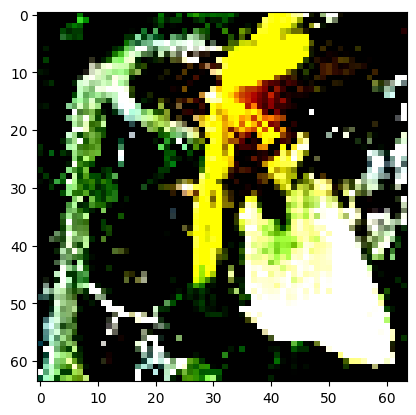

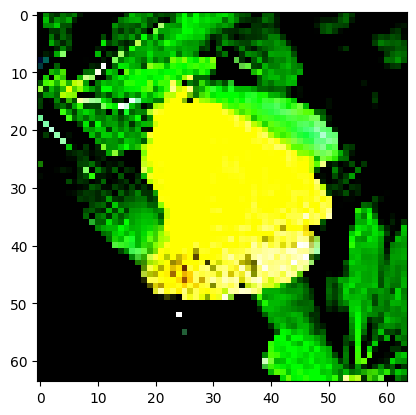

In [9]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

### Тренировочный класс lightning

In [10]:
class MyModule(pl.LightningModule):
    def __init__(self, learning_rate=0.001):
        super().__init__()
        self.model = torchvision.models.densenet169(weights=None, num_classes=200)
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        self.log("train_accuracy", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)

In [11]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

module = MyModule()
device

'cuda:0'

In [12]:
trainer = pl.Trainer(accelerator="auto", max_epochs=10)
trainer.fit(module, train_dataloader, val_dataloader)
trainer.save_checkpoint("1_densenet169.ckpt")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | DenseNet         | 12.8 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
12.8 M    Trainable params
0         Non-trainable params
12.8 M    Total params
51.270    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

In [26]:
load_module = MyModule.load_from_checkpoint(checkpoint_path="1_densenet169.ckpt")   # подгружаю сохраненный модуль
load_trainer = pl.Trainer(accelerator="auto", max_epochs=10)    # инициализирую Trainer

val_accuracy = load_trainer.validate(load_module, val_dataloader)[0]['val_accuracy']    # делаю валидацию и из лога беру значение val_accuracy
print()
print(f"!= Оценка за это задание составит {np.clip(10 * val_accuracy / 0.44, 0, 10):.2f} баллов =!")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.44449999928474426    │
│         val_loss          │     2.358482837677002     │
└───────────────────────────┴───────────────────────────┘


!= Оценка за это задание составит 10.00 баллов =!


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

### Тренировочный класс lightning

In [ ]:
train_transform = transforms.Compose(
    [
        transforms.Resize(232),
        transforms.CenterCrop(224),

        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)
val_transform = transforms.Compose(
    [
        transforms.Resize(232),
        transforms.CenterCrop(224),

        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

In [ ]:
class MyModule(pl.LightningModule):
    def __init__(self, learning_rate=0.001):
        super().__init__()
        self.model = torchvision.models.convnext_large(weights='DEFAULT')
        self.model.requires_grad_(False)
        self.classifier = nn.Sequential(
            nn.LeakyReLU(),
            nn.Linear(1000, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(),
            nn.Dropout(),
            nn.Linear(1024, 200)
        )
        self.learning_rate = learning_rate
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x):
        with torch.no_grad():
            features = self.model(x)
        return self.classifier(features)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.classifier.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        self.log("train_accuracy", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

module = MyModule()
device

Downloading: "https://download.pytorch.org/models/convnext_large-ea097f82.pth" to /root/.cache/torch/hub/checkpoints/convnext_large-ea097f82.pth
100%|██████████| 755M/755M [00:05<00:00, 147MB/s]


'cuda:0'

In [ ]:
trainer = pl.Trainer(accelerator="auto", max_epochs=2)
trainer.fit(module, train_dataloader, val_dataloader)
trainer.save_checkpoint("2_convnext_l.ckpt")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | ConvNeXt         | 197 M 
1 | classifier | Sequential       | 1.2 M 
2 | loss       | CrossEntropyLoss | 0     
------------------------------------------------
1.2 M     Trainable params
197 M     Non-trainable params
198 M     Total params
795.998   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


### Валидация результатов задания

In [ ]:
val_res = trainer.validate(module, val_dataloader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.8438000082969666     │
│         val_loss          │    0.6058498620986938     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
print(f"Оценка за это задание составит {np.clip(10 * (val_res[0]['val_accuracy'] - 0.5) / 0.34, 0, 10):.2f} баллов")

Оценка за это задание составит 10.00 баллов


### или одной ячейкой с загрузкой `checkpoint`

In [ ]:
load_module = MyModule.load_from_checkpoint(checkpoint_path="2_convnext_l.ckpt")    # подгружаю сохраненный модуль
load_trainer = pl.Trainer(accelerator="auto", max_epochs=2)     # инициализирую Trainer

accuracy = load_trainer.validate(load_module, val_dataloader)[0]['val_accuracy']      # делаю валидацию и из лога беру значение val_accuracy
print()
print(f"!= Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов =!")

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Отсюда взял подсчёт `mean` and `std` для нормализации данных [тык](https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html#:~:text=def%C2%A0batch_mean_and_sd(loader)%3A).

Во всех моделях использовал `Adam optimizer` и даже никак с ним не экспериментировал.

**Task 1**

Начал с модели `resnet18` без аугментации. **НЕ ПО ДЕЛУ:**

[ Почему без аугментации? - Не знаю =) так "карта легла" (я просто забыл про неё...). Когда я о ней вспомнил (ладно, мне напомнили*), я себя тааким дибилом чувствовал... Но когда стал аугментировать, пришло понимание, что да, аугментация улучшает модель, но сколько она времени сжирает.. это просто ужас. На фоне таких затрат по времени - улучшение модели практически не замечалось. Поэтому я отчасти даже благодарен своему мозгу, что он забыл про аугментацию :) я смог побольше потыкаться и поэкспериментировать. ]

Про подбор `learning_rate`:
* [Tuner](https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.tuner.tuning.Tuner.html#lightning.pytorch.tuner.tuning.Tuner.lr_find). Попробовал его использовать для того, чтобы найти `learning_rate` для модели, но получилось вообще не очень. Как я считаю, он подобрал аномально большой `lr (0.1318)` из-за этого модель практически не училась и выдавала почти всегда неправильные ответы, из-за этого accuracy было около 0 всегда (`val_accuracy=0.04`).

* [LearningRateFinder](https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.callbacks.LearningRateFinder.html). Он подобрал `lr=0.1905`, но с ним работает вполне нормально, `val_accuracy=0.31`. Хотя судя по документации, логика реализации одинаковая. Но почему `Tuner` не работает, а `LearningRateFinder` работает - не знаю (попробовал разобраться - не получилось, к сожалению, тяжко).

**`Scheduler`:** пробовал только `ExponentialLR` c `gamma=0.9`, либо `gamma=0.95`. Когда делал первые запуски с дефолтным `lr=0.001` для `Adam`, когда разбирался с `Tuner` и `LearningRateFinder`, понял, что модель на первых эпохах достаточно адекватно реагирует на `lr` от `0.01` до `0.001`, но под конец ощущалось, что ей нужна помощь и нужно уменьшить `lr`. Поэтому и выбрал `ExponentialLR` и такие большие `gamma` (около единичные), чтобы `lr` медленно уменьшался. Не сказал бы, что `scheduler` очень сильно помог, но всё же, увеличил `val_accuracy` на `0.01`.

Перешёл на `resnet50` и внедрил аугментацию, которая была представлена на семинаре:
```
transforms.ColorJitter(hue=0.05, saturation=0.05),
transforms.RandomHorizontalFlip(),
transforms.RandomRotation(20)
```
иииии стало `val_accuracy=0.4`! Пробовал ещё экспериментировать с аугментацией, в итоге вот такую свою собрал:
```
v2.RandomPhotometricDistort(p=0.75),
v2.RandomHorizontalFlip(),
v2.RandomRotation(20),
v2.RandomChannelPermutation(),
v2.RandomPosterize(bits=5),
```
работало дольше, д и к тому же `val_accuracy=0.41` получилось всего лишь добиться...

Ну и финишная прямая - стал использовать другие модели. Наткнулся на статью на [хабре](https://habr.com/ru/companies/nix/articles/430524/), где я остановился на графике, который встречает при открытии страницы, и увидел там `DenseNet`. Решил взять `densenet169` так как он был "типо по серединке". И чудо, `val_accuracy=0.44`!

**Task 2**

Сначала не думая просто взял тот же `densenet169`, но предобученный. И, честно говоря, был удивлён, что с pretrain'ом даже `val_accuracy=0.5` не смог перешагнуть... Я подумал, что где-то я косячу (а оказалось, что нет, просто модель неудачная, и чтобы это понять, я потратил немало времени...). Я несколько раз перепроверял код `class MyModule`, использовал другие аугментации, убирал их, убирал нормализацию, использовал другие нормализации и тп и тд - и всё бестолку. Тильтанул и забил.

Потом просто применил `Resize` и результат космический! Перешагнул `val_accuracy=0.5` и стало `val_accuracy=0.65`! В целом, к чему бы я его не применял, `val_accuracy` увеличивалось примерно на `0.2`. Да, тут тоже обучение становилось дольше, но с таким результатом - это стоит того, я даже скажу "дешево, но сердито".

И снова я потратил немало времени на то, чтоб перешагнуть этот чертов `val_accuracy=0.65`, позабыв, что есть другие модели... Но за это время, я написал свой `nn.Sequential`, который принимает выходы предобученной модели:
```
nn.Sequential(
    nn.LeakyReLU(),
    nn.Linear(1000, 1024),
    nn.BatchNorm1d(1024),
    nn.LeakyReLU(),
    nn.Dropout(),
    nn.Linear(1024, 200)
)
```
В целом он давал увеличение `val_accuracy` на 0.02-0.05, пойдёт.

Короче, снова тильтанул, но уже не забил, а просто по [списку](https://pytorch.org/vision/stable/models.html#:~:text=The%20following-,classification%20models,-are%20available%2C%20with) начал внедрять и использовать модели. Я использовал `Resize`, `Crop` и нормализацию, которые указываются в документации к каждой модели, руководствуясь тем, что раз модели на это были обучены, значит я им тоже должен кормить что-то похожее (ну или такое же).

Сразу же залетела на `val_accuracy=0.83` модель `convnext_large` за одну эпоху (но одна эпоха = 40+ минут). Ну а дальше, я просто решил пройтись по списку полностью.
Вот модельки, которые показали `0.8 <= val_accuracy <= 0.83`:
```
convnext_base
swin_v2_b
vit_l_16
vit_b_16
vit_b_32
```

Итог: две эпохи `convnext_large` - `val_accuracy=0.84`.